In [ ]:
# Import necessary libraries for data manipulation, analysis, and machine learning
import pandas as pd  # Used for working with dataframes (tables)
import numpy as np  # Used for numerical operations, especially with arrays
import matplotlib.pyplot as plt  # Used for creating visualizations (plots and charts)
from sklearn.model_selection import train_test_split  # Used to split data into training and testing sets
from sklearn.ensemble import RandomForestRegressor  # Imports the Random Forest regression model
from sklearn.tree import DecisionTreeRegressor  # Imports the Decision Tree regression model
from xgboost import XGBRegressor  # Imports the XGBoost regression model
from sklearn.metrics import mean_squared_error, r2_score  # Imports metrics for evaluating model performance
from sklearn import metrics  # Imports additional metrics for model evaluation
from sklearn.preprocessing import StandardScaler  # Imports a tool for data scaling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the dataset into a pandas Dataframe
data = pd.read_csv('/content/drive/MyDrive/Data/wind2.csv')

In [ ]:
#Info about the data
print(data.head())
print(data.shape)

   Month  Year  Wind Power
0      1  2015         NaN
1      2  2015         NaN
2      3  2015         NaN
3      4  2015      514.68
4      5  2015      738.01
(120, 3)


In [ ]:
#Drop rows where wind power is 0
data = data[data['Wind Power'] != 0]

In [ ]:
data.head()

,Month,Year,Wind Power
0,1,2015,NaN
1,2,2015,NaN
2,3,2015,NaN
3,4,2015,514.68
4,5,2015,738.01


In [ ]:
#Introduce policy features to analyse policy effects
data['Wind_policy_2002'] = 1
data['GERC_policy_2006'] = 1
data['Wind_policy_2007'] = 1
data['Wind_policy_2009'] = 1
data['Wind_policy_2013'] = 1
data['Wind_policy_2016'] = np.where(data['Year'] >= 2016, 1, 0)
data['GERC_wind_tariffs_2020'] = np.where(data['Year'] >= 2020, 1, 0)


In [ ]:
data.head()

,Month,Year,Wind Power,Wind_policy_2002,GERC_policy_2006,Wind_policy_2007,Wind_policy_2009,Wind_policy_2013,Wind_policy_2016,GERC_wind_tariffs_2020
0,1,2015,NaN,1,1,1,1,1,0,0
1,2,2015,NaN,1,1,1,1,1,0,0
2,3,2015,NaN,1,1,1,1,1,0,0
3,4,2015,514.68,1,1,1,1,1,0,0
4,5,2015,738.01,1,1,1,1,1,0,0


In [ ]:
#Drop rows where wind power is not a number
data = data.dropna(subset=['Wind Power'])

<ipython-input-69-2f7acad3a377>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time_datetime'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str) + '-01') # Assuming you have 'Year' and 'Month' columns


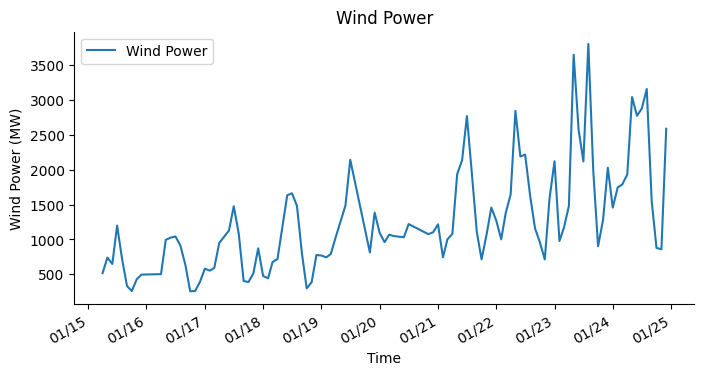

In [ ]:
# @title Wind Power
#Plot the graph for wind power from the dataset
from matplotlib import pyplot as plt

data['Time_datetime'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str) + '-01') # Assuming you have 'Year' and 'Month' columns


# Create the line plot
data.plot(x='Time_datetime', y='Wind Power', kind='line', figsize=(8, 4), title='Wind Power')

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))

plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel("Time")
plt.ylabel("Wind Power (MW)")
plt.show()

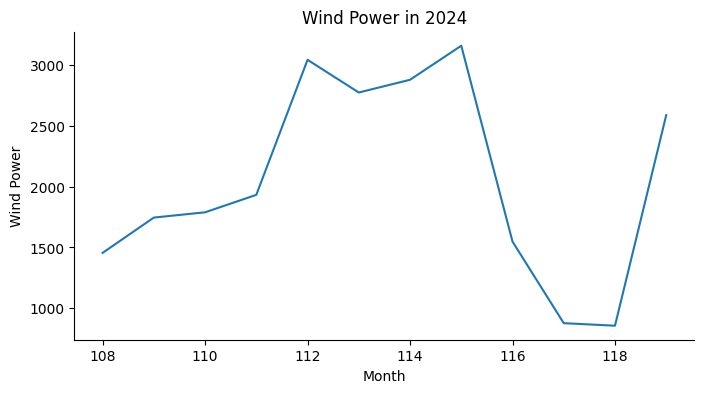

In [ ]:
from matplotlib import pyplot as plt
#Plotting data only for 2024
# Filter data for 2015
data_2015 = data[data['Year'] == 2024]

# Plot Wind Power for 2015
data_2015['Wind Power'].plot(kind='line', figsize=(8, 4), title='Wind Power in 2024')
plt.gca().spines[['top', 'right']].set_visible(False)  # Remove top and right spines
plt.xlabel("Month")  # Add x-axis label
plt.ylabel("Wind Power")  # Add y-axis label
plt.show()  # Display the plot

In [ ]:
# prompt: make only july 1 for the years 201 and 2020 and make the rest of the months as 0 for both the years, retain the month number for remaining years

# Assuming 'Month' column represents the month number (1-12)
# and 'Year' column represents the year.

def modify_month_data(df):
    for index, row in df.iterrows():
        year = row['Year']
        month = row['Month']

        if year == 2016 or year == 2020:
            if month == 7:
                continue # Keep July as it is
            else:
                df.loc[index, 'Month'] = 0 # Set other months to 0
    return df

data = modify_month_data(data)


In [ ]:


# Handle cyclic month encoding

data['month_sin'] = np.sin(2 * np.pi * data['Month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['Month'] / 12)


#Yearly variation
data['Year_scaled'] = data['Year'] - data['Year'].min()

features = data[['Year_scaled','month_sin','month_cos','Wind_policy_2002','GERC_policy_2006','Wind_policy_2007','Wind_policy_2009','Wind_policy_2013','Wind_policy_2016','GERC_wind_tariffs_2020']]

target = data['Wind Power']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
data.head()

,Month,Year,Wind Power,Wind_policy_2002,GERC_policy_2006,Wind_policy_2007,Wind_policy_2009,Wind_policy_2013,Wind_policy_2016,GERC_wind_tariffs_2020,Time_datetime,month_sin,month_cos,Year_scaled
3,4,2015,514.68,1,1,1,1,1,0,0,2015-04-01,8.660254e-01,-0.500000,0
4,5,2015,738.01,1,1,1,1,1,0,0,2015-05-01,5.000000e-01,-0.866025,0
5,6,2015,646.86,1,1,1,1,1,0,0,2015-06-01,1.224647e-16,-1.000000,0
6,7,2015,1196.89,1,1,1,1,1,0,0,2015-07-01,-5.000000e-01,-0.866025,0
7,8,2015,720.14,1,1,1,1,1,0,0,2015-08-01,-8.660254e-01,-0.500000,0


In [ ]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
X_train

,Year_scaled,month_sin,month_cos,Wind_policy_2002,GERC_policy_2006,Wind_policy_2007,Wind_policy_2009,Wind_policy_2013,Wind_policy_2016,GERC_wind_tariffs_2020
70,5,0.000000e+00,1.000000e+00,1,1,1,1,1,1,1
29,2,1.224647e-16,-1.000000e+00,1,1,1,1,1,1,0
91,7,-8.660254e-01,-5.000000e-01,1,1,1,1,1,1,1
51,4,8.660254e-01,-5.000000e-01,1,1,1,1,1,1,0
87,7,8.660254e-01,-5.000000e-01,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
86,7,1.000000e+00,6.123234e-17,1,1,1,1,1,1,1
20,1,0.000000e+00,1.000000e+00,1,1,1,1,1,1,0
107,8,-2.449294e-16,1.000000e+00,1,1,1,1,1,1,1
62,5,0.000000e+00,1.000000e+00,1,1,1,1,1,1,1


In [ ]:
features

,Year_scaled,month_sin,month_cos,Wind_policy_2002,GERC_policy_2006,Wind_policy_2007,Wind_policy_2009,Wind_policy_2013,Wind_policy_2016,GERC_wind_tariffs_2020
3,0,8.660254e-01,-5.000000e-01,1,1,1,1,1,0,0
4,0,5.000000e-01,-8.660254e-01,1,1,1,1,1,0,0
5,0,1.224647e-16,-1.000000e+00,1,1,1,1,1,0,0
6,0,-5.000000e-01,-8.660254e-01,1,1,1,1,1,0,0
7,0,-8.660254e-01,-5.000000e-01,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
115,9,-8.660254e-01,-5.000000e-01,1,1,1,1,1,1,1
116,9,-1.000000e+00,-1.836970e-16,1,1,1,1,1,1,1
117,9,-8.660254e-01,5.000000e-01,1,1,1,1,1,1,1
118,9,-5.000000e-01,8.660254e-01,1,1,1,1,1,1,1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Define individual models
model1 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=5, min_samples_split=5, min_samples_leaf=3, subsample=0.85, random_state=42)
model2 = RandomForestRegressor(n_estimators=200, random_state=42)
model3 = XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')

# Create the ensemble model
ensemble_model = VotingRegressor(estimators=[('gb', model1), ('rf', model2), ('xgb', model3)],)

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)  # Use your training data here


VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=5,
                                                       min_samples_leaf=3,
                                                       min_samples_split=5,
                                                       n_estimators=500,
                                                       random_state=42,
                                                       subsample=0.85)),
                            ('rf',
                             RandomForestRegressor(n_estimators=200,
                                                   random_state=42)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=Non...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=100,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=42, ...))])

In [ ]:
#Predict using the ensemble model
y_pred = ensemble_model.predict(features)



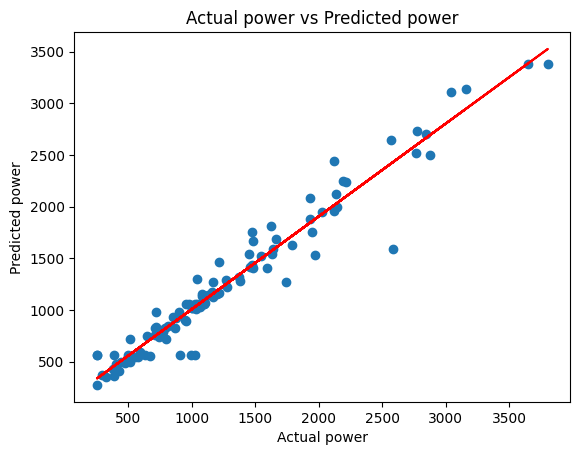

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate best-fit line
m, b = np.polyfit(target, y_pred, 1)  # 1 for linear regression

# Create scatter plot with best-fit line
plt.scatter(target, y_pred)
plt.plot(target, m * target + b, color='red')  # Plot the best-fit line
plt.xlabel("Actual power")
plt.ylabel("Predicted power")
plt.title("Actual power vs Predicted power")
plt.show()

In [ ]:
#Evaluate the model on training data
mse = mean_squared_error(target, y_pred)
r2 = r2_score(target, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Train Prediction Std Dev: {np.std(y_pred):.4f}")

Mean Squared Error: 33582.15
R^2 Score: 0.94
Train Prediction Std Dev: 702.6257


In [ ]:
y_pred2 = ensemble_model.predict(X_test)

In [ ]:
#Evaluate the model on testing data
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Test Prediction Std Dev: {np.std(y_pred2):.4f}")

Mean Squared Error: 97402.89
R^2 Score: 0.79
Test Prediction Std Dev: 527.5062


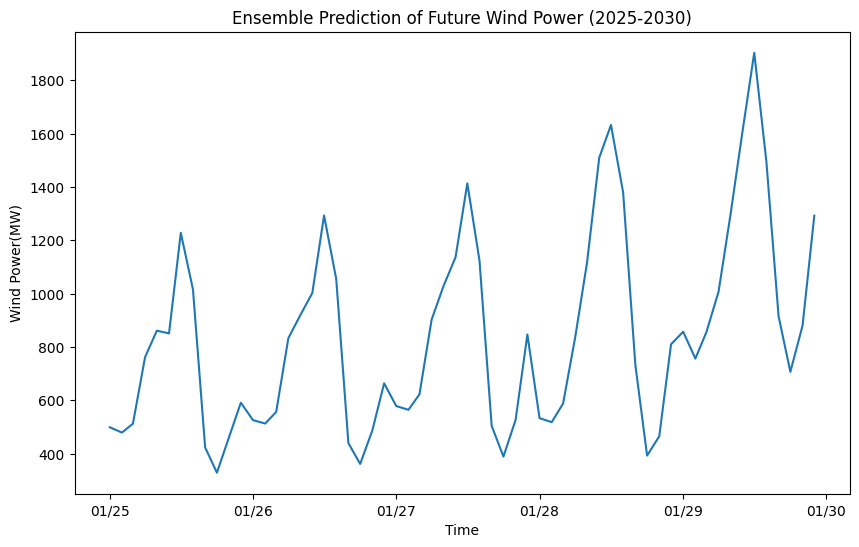

Future Prediction Std Dev: 367.7623
['Year_scaled', 'month_sin', 'month_cos', 'Wind_policy_2002', 'GERC_policy_2006', 'Wind_policy_2007', 'Wind_policy_2009', 'Wind_policy_2013', 'Wind_policy_2016', 'GERC_wind_tariffs_2020']


In [ ]:
#Making future predictions by making new dataset for future years
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Future data
future_months = []
future_years = []


for year in range(2025, 2030):  # Include years 2025 to 2030
    for month in range(1, 13):
        future_years.append(year)
        future_months.append(month)
# Create DataFrame
future_data = pd.DataFrame({'Month': future_months, 'Year': future_years})

# Create Time feature if used during training
future_data['Time'] = future_data['Year'] * 12 + future_data['Month']


future_data['Wind_policy_2002'] = 1
future_data['GERC_policy_2006'] = 1
future_data['Wind_policy_2007'] = 1
future_data['Wind_policy_2009'] = 1
future_data['Wind_policy_2013'] = 1
future_data['Wind_policy_2016'] = 1
future_data['GERC_wind_tariffs_2020'] = 1
# Handle cyclic month encoding
future_data['month_sin'] = np.sin(2 * np.pi * future_data['Month'] / 12)
future_data['month_cos'] = np.cos(2 * np.pi * future_data['Month'] / 12)

future_data["Year_scaled"] = future_data["Year"] - future_data["Year"].min()

# Ensure features match training
features = ['Year_scaled','month_sin','month_cos','Wind_policy_2002','GERC_policy_2006','Wind_policy_2007','Wind_policy_2009','Wind_policy_2013','Wind_policy_2016','GERC_wind_tariffs_2020']

#Predict energy for future years
future_energy = ensemble_model.predict(future_data[features])


# Convert 'Time' to datetime objects for proper formatting
future_data['Time_datetime'] = pd.to_datetime(future_data['Year'].astype(str) + '-' + future_data['Month'].astype(str) + '-01')

# Plot predictions with date formatting
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size if needed
ax.plot(future_data['Time_datetime'], future_energy)  # Assuming 'Wind Power Prediction' is the column name for predictions
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))  # Format x-axis as mm/yy
ax.set_xlabel("Time")
ax.set_ylabel("Wind Power(MW)")
ax.set_title("Ensemble Prediction of Future Wind Power (2025-2030)")
plt.show()

print(f"Future Prediction Std Dev: {np.std(future_energy):.4f}")
print(features)


Ensemble Model - Mean Squared Error: 97402.89
Ensemble Model - R^2 Score: 0.79
Ensemble Train Prediction Std Dev: 738.5783


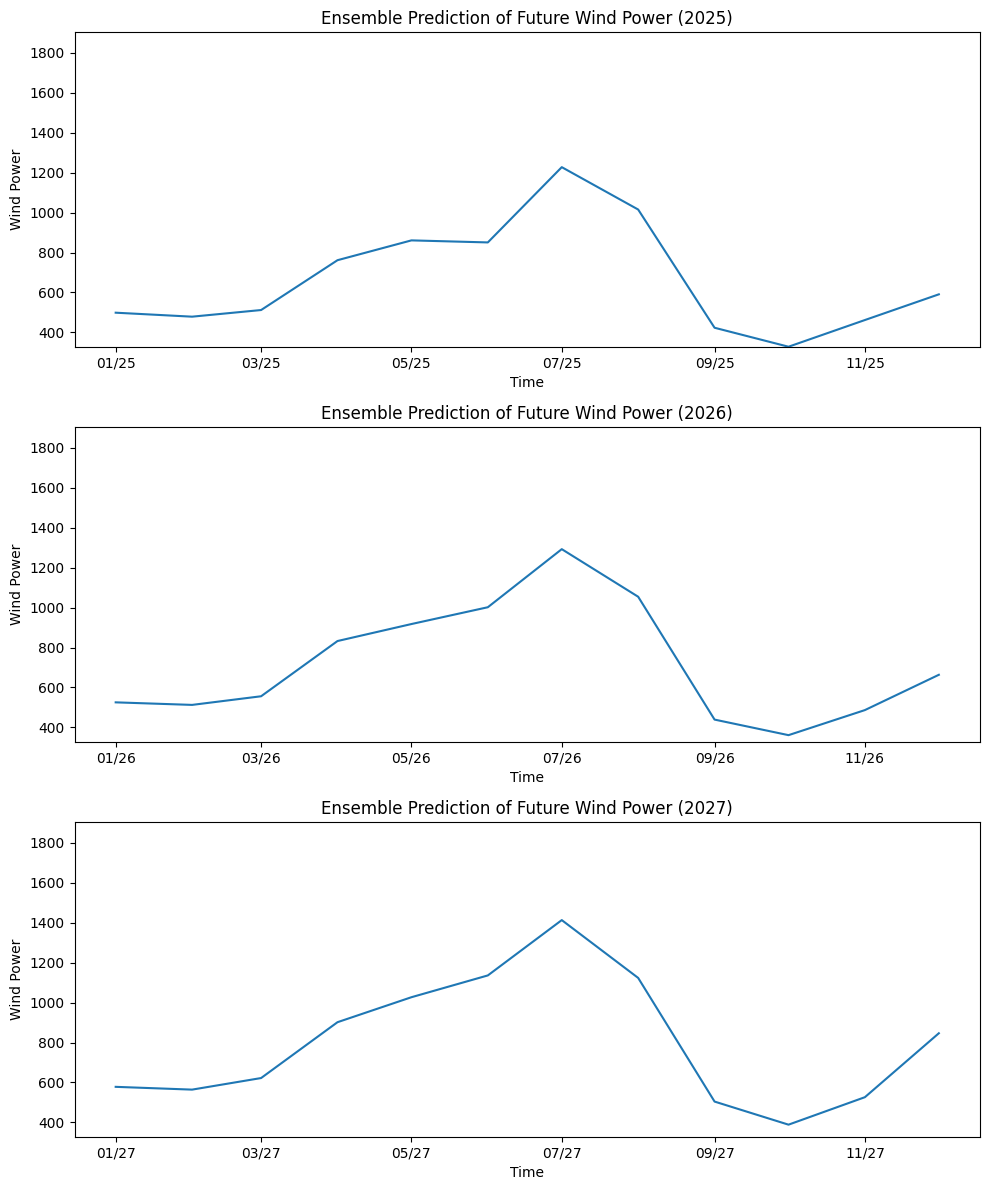

In [ ]:
# prompt: how to do ensemble modelling for this dataset and for predicting future values
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import VotingRegressor

# Define the individual models
model1 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=5, min_samples_split=5, min_samples_leaf=3, subsample=0.85, random_state=42)
model2 = RandomForestRegressor(n_estimators=200, random_state=42)  # Example, adjust parameters as needed
model3 = XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror') # Example, adjust parameters as needed

# Create the ensemble model
ensemble_model = VotingRegressor(estimators=[('gb', model1), ('rf', model2), ('xgb', model3)])

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)


# Predictions
y_pred_ensemble = ensemble_model.predict(X_test)
y_pred_ensemble_train = ensemble_model.predict(X_train)

# Evaluation Metrics
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)
print(f"Ensemble Model - Mean Squared Error: {mse_ensemble:.2f}")
print(f"Ensemble Model - R^2 Score: {r2_ensemble:.2f}")
print(f"Ensemble Train Prediction Std Dev: {np.std(y_pred_ensemble_train):.4f}")

# Future Predictions with Ensemble
future_energy_ensemble = ensemble_model.predict(future_data[features])

# Convert 'Time' to datetime objects for proper formatting
future_data['Time_datetime'] = pd.to_datetime(future_data['Year'].astype(str) + '-' + future_data['Month'].astype(str) + '-01')

# Filter data for 2025 and 2026
future_data_2025 = future_data[future_data['Year'] == 2025]
future_data_2026 = future_data[future_data['Year'] == 2026]
future_data_2027 = future_data[future_data['Year'] == 2027]


# Find the minimum and maximum y-values across all predictions
min_y = min(future_energy_ensemble)
max_y = max(future_energy_ensemble)

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))  # 3 rows, 1 column

# Plot for 2025
axes[0].plot(future_data_2025['Time_datetime'], future_energy_ensemble[:12])
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Wind Power")
axes[0].set_title("Ensemble Prediction of Future Wind Power (2025)")
axes[0].set_ylim([min_y, max_y])  # Set y-axis limits

# Plot for 2026
axes[1].plot(future_data_2026['Time_datetime'], future_energy_ensemble[12:24])
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Wind Power")
axes[1].set_title("Ensemble Prediction of Future Wind Power (2026)")
axes[1].set_ylim([min_y, max_y])  # Set y-axis limits

# Plot for 2027
axes[2].plot(future_data_2027['Time_datetime'], future_energy_ensemble[24:36])
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Wind Power")
axes[2].set_title("Ensemble Prediction of Future Wind Power (2027)")
axes[2].set_ylim([min_y, max_y])  # Set y-axis limits

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [ ]:
!pip install openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Import mdates for date formatting
from openpyxl import Workbook

# ... (Your existing code for generating future_data and future_energy) ...

# Filter data for 2025 to 2030
future_data_2025_2030 = future_data[(future_data['Year'] >= 2025) & (future_data['Year'] <= 2030)]

# Create a new DataFrame with predictions and combined Month/Year column
predictions_df = pd.DataFrame({
    'Month/Year': pd.to_datetime(future_data_2025_2030['Year'].astype(str) + '-' + future_data_2025_2030['Month'].astype(str) + '-01').dt.strftime('%m/%Y'),
    'Predicted Wind Power (MW)': future_energy  # Use all future_energy values as it covers 2025-2030
})

# Create a new Excel workbook and sheet
workbook = Workbook()
sheet = workbook.active
sheet.title = 'Wind Power Predictions'

# Write headers to the sheet
sheet.append(['Month/Year', 'Predicted Wind Power (MW)'])

# Write data to the sheet
for index, row in predictions_df.iterrows():
    sheet.append([row['Month/Year'], row['Predicted Wind Power (MW)']])

# Save the workbook
workbook.save('wind_power_predictions_2025_2030.xlsx')